<font color = blue size =6>  影像處理與應用
---

In [9]:
import matplotlib.pyplot as plt
import random
from PIL import Image, ImageFilter
from ipywidgets import Button,HBox,Output,Layout,Label
from IPython.display import display, clear_output
BasePath = 'D:\\pythonImage\\'
# pre_name = '/content/drive/MyDrive/Python/imagesDB/'
image1  = BasePath + 'faceBase/Audrey_02.jpg'
image2  = BasePath + 'faceBase/Lenna_01.png'
image5  = BasePath + 'faceBase/fubon.jpg'
image3  = BasePath + 'imagesDB/heartRV.png'
image4  = BasePath + 'imagesDB/Sun_Moon_Lake.jpg'
resImage1 = BasePath + 'results/res1.png'
resImage2 = BasePath + 'results/res2.png'
resImage3 = BasePath + 'results/res3.png' 

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

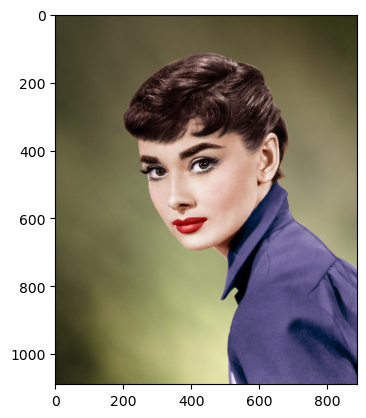

In [12]:
im00 = Image.open(image1)
_ = plt.imshow(im00)

# 基本影像處理

彩色圖轉灰階圖

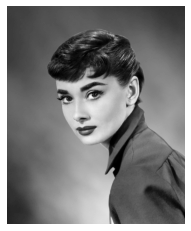

In [ ]:
im00 = Image.open(image1)         # 1. 讀入圖檔
res=im00.convert('L')             # 2. 彩色轉灰階 
plt.axis('off')
_ = plt.imshow(res, cmap='gray')  # 3. 顯示圖檔
# 儲存結果
plt.savefig(resImage1, bbox_inches='tight', pad_inches=0, dpi=300)

模糊化圖片

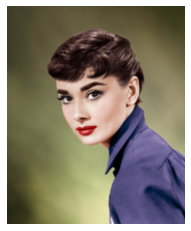

In [ ]:
im00 = Image.open(image1)         # 1. 讀入圖檔                               
res=im00.filter(ImageFilter.BLUR)      # 2. 彩色轉灰階/模糊化 
plt.axis('off')               # 3. 顯示圖檔
_ = plt.imshow(res)

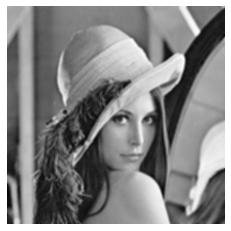

In [ ]:
im01 = Image.open(image2)   # 1. 讀入圖檔
img=im01.convert('L')       # 2. 彩色轉灰階/模糊化
res=img.filter(ImageFilter.BLUR)
plt.axis('off')             # 3. 顯示圖檔
_ = plt.imshow(res, cmap='gray')

輪廓處理

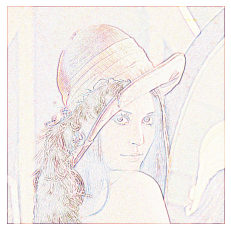

In [ ]:
im00 = Image.open(image2)      # 1. 讀入圖檔
res=im00.filter(ImageFilter.CONTOUR) # 2. 彩色鉛筆畫
plt.axis('off')           # 3. 顯示圖檔
_ = plt.imshow(res)

邊緣強化處理

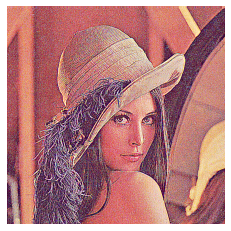

In [ ]:
im = Image.open(image2)      # 1. 讀入圖檔
r=im.filter(ImageFilter.EDGE_ENHANCE)# 2. 邊緣強化
r=r.filter(ImageFilter.EDGE_ENHANCE)
plt.axis('off')           # 3. 顯示圖檔
_ = plt.imshow(r)

浮雕處理

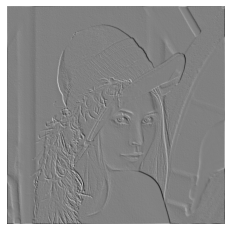

In [ ]:
im00 = Image.open(image2)      # 1. 讀入圖檔
img=im00.convert('L')          # 2. 轉灰階/浮雕處理
imf=img.filter(ImageFilter.EMBOSS)
plt.axis('off')                # 3. 顯示圖檔
_ = plt.imshow(imf, cmap='gray')

# 進階影像處理

旋轉圖片

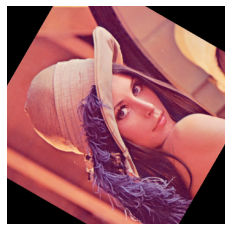

In [ ]:
im00 = Image.open(image2) # 1. 讀入圖檔
img= im00.rotate(60)      # 2. 旋轉影像 (逆時針轉)
plt.axis('off')           # 3. 顯示圖檔
_ = plt.imshow(img)

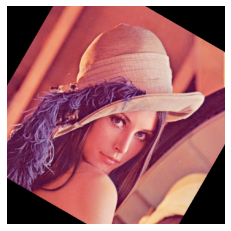

In [ ]:
im00 = Image.open(image2) # 1. 讀入圖檔
img= im00.rotate(-30)     # 2. 旋轉影像 (逆時針轉)
plt.axis('off')           # 3. 顯示圖檔
_ = plt.imshow(img)

剪裁圖片

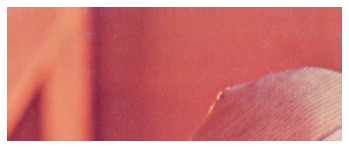

In [ ]:
im00 = Image.open(image2) # 1. 讀入圖檔
img=im00.crop([0,0,250,100]) # 2. 影像剪裁 
plt.axis('off')           # 3. 顯示圖檔
_ = plt.imshow(img)

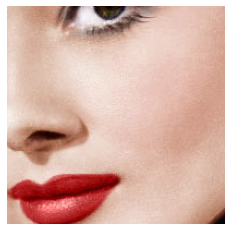

In [ ]:
im00 = Image.open(image1) # 1. 讀入圖檔
# 2. 影像剪裁
width, height = im00.size[0], im00.size[1]
w, h, cx, cy =100,100, width//2, height//2
img=im00.crop((cx-w, cy-h, cx+w, cy+h))
plt.axis('off')           # 3. 顯示圖檔
_ = plt.imshow(img)

# 結合圖片與遮罩處理

**結合圖片**

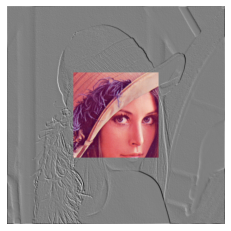

In [ ]:
im00 = Image.open(image2) # 1. 讀入圖檔
# 2. 做中心圖..影像剪裁
width, height = im00.size[0], im00.size[1]
w, h, cx, cy =100, 100, width//2, height//2
img_ctr=im00.crop((cx-w, cy-h, cx+w, cy+h))
# 3. 做背景圖..彩色轉灰階浮雕
img=im00.convert('L')
img=img.filter(ImageFilter.EMBOSS)
img_back=img.convert('RGB')
# 4. 影像結合
img_back.paste(img_ctr, [cx-w, cy-h])
# 5. 顯示圖檔
plt.axis('off')
_ = plt.imshow(img_back)

<mark>問題：載入一個長方形圖片，製作一張背景是灰階鉛筆畫，中心是彩色的圖片，彩色的長、寬佔原始圖的二分之一。

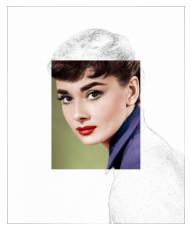

In [ ]:
im00 = Image.open(image1)                  # 1. 讀入圖檔
width, height = im00.size[0], im00.size[1] # 2. 做中心圖/剪裁
w, h, cx, cy =width//4, height//4, width//2, height//2
img_ctr=im00.crop((cx-w, cy-h, cx+w, cy+h))
img=im00.convert('L')           # 3. 做背景圖..彩色轉灰階鉛筆畫
img=img.filter(ImageFilter.CONTOUR)
img_back=img.convert('RGB')
img_back.paste(img_ctr, [cx-w, cy-h]) # 4. 影像結合
plt.axis('off')                       # 5. 顯示圖檔
_ = plt.imshow(img_back)

**遮罩處理**

<font color=blue>確認底圖

(512, 512)


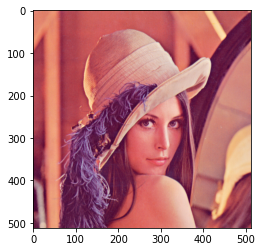

In [ ]:
im00 = Image.open(image2)
#plt.axis('off')
print(im00.size)
_ = plt.imshow(im00)

(512, 512)


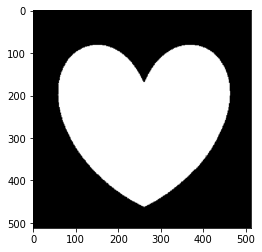

In [ ]:
maskImg = Image.open(image3) # 準備過濾遮罩
#plt.axis('off')
print(maskImg.size)
_=plt.imshow(maskImg)

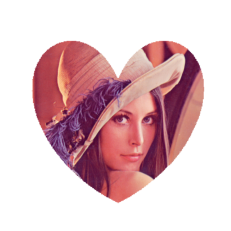

In [ ]:
img_ctr = Image.open(image2)  # 1. 準備中心圖
maskImg = Image.open(image3)  # 2. 準備過濾遮罩
maskImg = maskImg.resize(im00.size)
im2 = maskImg.convert('L')    # 3. 將遮罩轉灰階
img_ctr.putalpha(im2)
plt.axis('off')
_=plt.imshow(img_ctr)

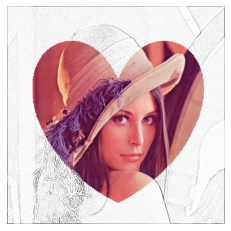

In [ ]:
img_ctr = Image.open(image2)  # 1. 準備中心圖
maskImg = Image.open(image3)  # 2. 準備過濾遮罩
maskImg = maskImg.resize(im00.size)
im2 = maskImg.convert('L')    # 3. 將遮罩轉灰階
img_ctr.putalpha(im2)
im00 = Image.open(image2)     # 4. 做背景圖
img=im00.convert('L')         #    彩色轉灰階/鉛筆畫
img=img.filter(ImageFilter.CONTOUR)
img_back=img.convert('RGB')
img_back.paste(img_ctr,[0, 0],img_ctr) # 5. 影像結合
plt.axis('off')                        # 6. 顯示圖檔
_ = plt.imshow(img_back)

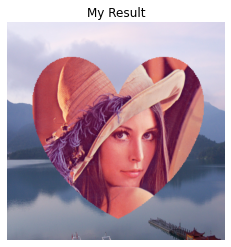

In [ ]:
img_ctr = Image.open(image2)           # 1. 準備中心圖
maskImg = Image.open(image3)           # 2. 準備過濾遮罩
maskImg = maskImg.resize(im00.size)
im2 = maskImg.convert('L')             # 3. 將遮罩轉灰階
img_ctr.putalpha(im2)
back_im = Image.open(image4)           # 4. 做背景圖
img_back = back_im.resize(img_ctr.size)
img_back.paste(img_ctr,[0, 0],img_ctr) # 5. 影像結合
plt.axis('off')                        # 6. 顯示圖檔
plt.title('My Result')
_ = plt.imshow(img_back)

---


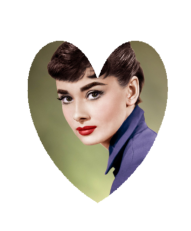

In [ ]:
# 1. 準備中心圖
im00 = Image.open(image1)
# 2. 準備過濾遮罩/調整遮罩大小
maskImg = Image.open(image3)
maskImg = maskImg.resize(im00.size)
# 3. 將遮罩轉灰階/截圖
im2 = maskImg.convert('L')
im00.putalpha(im2)
plt.axis('off')
_=plt.imshow(im00)

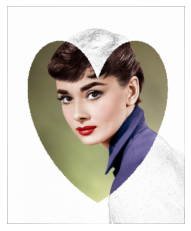

In [ ]:
# 1. 準備中心圖
img_ctr = Image.open(image1)
# 2. 準備過濾遮罩/調整遮罩大小/轉灰階/截圖
maskImg = Image.open(image3)
maskImg = maskImg.resize(img_ctr.size)
im2 = maskImg.convert('L')
img_ctr.putalpha(im2)
# 3. 做背景圖..彩色轉灰階
im00 = Image.open(image1)
img=im00.convert('L')
res=img.filter(ImageFilter.CONTOUR)
img_back=res.convert('RGB')
# 4. 影像結合
img_back.paste(img_ctr, [0, 0],img_ctr)
# 5. 顯示圖檔
plt.axis('off')
_ = plt.imshow(img_back)
plt.savefig(resImage1, bbox_inches='tight', pad_inches=0, dpi=300)

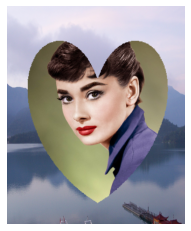

In [ ]:
# 1. 準備中心圖
img_ctr = Image.open(image1)
# 2. 準備過濾遮罩/調整遮罩大小/轉灰階/截圖
maskImg = Image.open(image3)
maskImg = maskImg.resize(img_ctr.size)
im2 = maskImg.convert('L')
img_ctr.putalpha(im2)
# 3. 做背景圖..彩色轉灰階
back_im = Image.open(image4)           # 4. 做背景圖
back_im = back_im.resize(img_ctr.size)
# 4. 影像結合
back_im.paste(img_ctr, [0, 0],img_ctr)
# 5. 顯示圖檔
plt.axis('off')
_ = plt.imshow(back_im)
plt.savefig(resImage1, bbox_inches='tight', pad_inches=0, dpi=300)

# 結合圖片的應用

**載入樸克牌的影像**

In [ ]:
cardimgs = []
for cc in range(54):
  fname = "poker{:02d}.png".format(cc)
  cardimgs.append(Image.open(pre_name+fname)) 

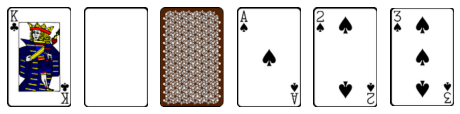

In [ ]:
fig , axs = plt.subplots(1, 6, figsize=(8, 4))
for i in range(-2,4):
  axs[i+2].axis(False)
  axs[i+2].imshow(cardimgs[i])

**樸克牌的洗牌/顯示樸克牌**

In [ ]:
players, suits_symbols = [], ["\u2660", "\u2665", "\u2666", "\u2663"]
deck = list(range(52))
random.shuffle(deck)
print(deck[:10])
for i in range(10):
  print("{}{:<2d}".format(suits_symbols[(deck[i])//13], deck[i]%13+1), end=' ')

[12, 39, 4, 41, 35, 6, 50, 33, 43, 38]
♠13 ♣1  ♠5  ♣3  ♦10 ♠7  ♣12 ♦8  ♣5  ♦13 

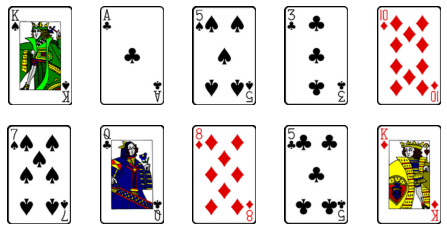

In [ ]:
fig , axs = plt.subplots(2, 5, figsize=(8, 4))
c_idx = 0
for i in range(2):
  for j in range(5):
    axs[i,j].axis(False)
    axs[i,j].imshow(cardimgs[deck[c_idx]+1])
    c_idx+=1

**互動式的翻牌**

In [ ]:
deck = list(range(52))
random.shuffle(deck)
print(deck[:10]) 
for i in range(10):
  s_no = deck[i]
  c_fo, c_no = s_no//13 , s_no%13+1
  print("{}{:<2d}".format(suits_symbols[c_fo], c_no), end=' ')

[14, 0, 3, 15, 36, 9, 19, 1, 4, 38]
♥2  ♠1  ♠4  ♥3  ♦11 ♠10 ♥7  ♠2  ♠5  ♦13 

In [ ]:
def show_imgs(img2):
  fig , axs = plt.subplots(1,2, figsize=(4, 3))
  axs[0].imshow(cardimgs[0])
  axs[0].axis(False)
  axs[1].imshow(img2)
  axs[1].axis(False)
def on_b1_clicked(b):
  global deck_cnt, lb
  clear_output()
  deck_cnt = 0 if deck_cnt==51 else deck_cnt+1
  lb.value='數字 '+str(deck[deck_cnt]%13+1 )
  display(HBox((b,lb)))
  show_imgs(cardimgs[deck[deck_cnt]+1]) 

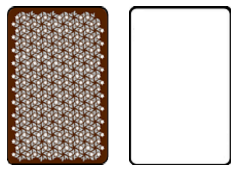

In [ ]:
ly = Layout(width='100px')
b1 = Button(description="下一張", layout=ly)
deck_cnt, output = -1, Output()
lb = Label("數字 0")
b1.on_click(on_b1_clicked)
display(HBox([b1, lb]))
show_imgs(cardimgs[-1])

---

In [ ]:
deck = list(range(52))
random.shuffle(deck)
print(deck[:10]) 
for i in range(10):
  s_no = deck[i]
  c_fo, c_no = s_no//13 , s_no%13+1
  print("{}{:<2d}".format(suits_symbols[c_fo], c_no), end=' ')

[30, 46, 9, 23, 0, 44, 31, 15, 8, 4]
♦5  ♣8  ♠10 ♥11 ♠1  ♣6  ♦6  ♥3  ♠9  ♠5  

In [ ]:
def on_b_clicked(b):
  global deck_cnt,lb,score
  clear_output()
  deck_cnt = 0 if deck_cnt==51 else deck_cnt+1
  numb = deck[deck_cnt]%13+1
  if (b.description == "A-6(小)" and numb < 7) or \
     (b.description == "8-K(大)" and numb > 7):
      score+=1
  elif b.description == "Lucky 7" and numb == 7:  
      score+=10
  lb.value='分數 '+str(score)
  display(HBox([b1,b2,b3,lb]))
  show_imgs(cardimgs[deck[deck_cnt]+1]) 

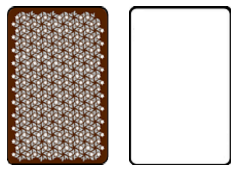

In [ ]:
ly70 = Layout(width='70px')
b1=Button(description="A-6(小)", layout=ly70)
b2=Button(description="Lucky 7", layout=ly70)
b3=Button(description="8-K(大)", layout=ly70)
b1.on_click(on_b_clicked)
b2.on_click(on_b_clicked)
b3.on_click(on_b_clicked)
deck_cnt, score = -1, 0
lb = Label("分數 0")
display(HBox([b1,b2,b3,lb]))
show_imgs(cardimgs[-1])

---
**顯示樂透彩球**

In [ ]:
no_imgs = []
for cc in range(51):
  fname = "{:02d}.png".format(cc)
  no_imgs.append(Image.open(pre_name+fname)) 

no_set = list(range(1, 50))  # no_set 包含 1~49
random.shuffle(no_set)
print(no_set[:10])

[41, 40, 24, 23, 19, 39, 1, 37, 11, 43]


樂透號碼與特別號


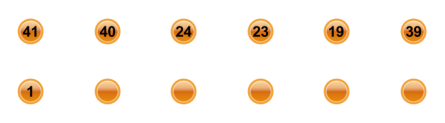

In [ ]:
fig, axs = plt.subplots(2, 6, figsize=(8, 2))
c_idx = 0
print("樂透號碼與特別號")
for j in range(6):
  axs[0,j].axis(False)
  axs[0,j].imshow(no_imgs[no_set[c_idx]])
  c_idx+=1
axs[1,0].axis(False) 
axs[1,0].imshow(no_imgs[no_set[c_idx]])
for j in range(1,6):
  axs[1,j].axis(False)
  axs[1,j].imshow(no_imgs[0])
  c_idx+=1

---
**按鈕開獎**

In [ ]:
no_imgs = []
for cc in range(51):
  fname = "s{:d}.png".format(cc)
  no_imgs.append(Image.open(pre_name+fname)) 

In [ ]:
def show_imgs():
  fig , axs = plt.subplots(2, 6, figsize=(8, 3))
  print("樂透號碼與特別號")
  c_idx = 0
  for j in range(6):
    axs[0,j].clear()
    axs[0,j].axis(False)
    axs[0,j].imshow(no_imgs[no_set[c_idx]])
    c_idx+=1
  axs[1,0].clear()
  axs[1,0].axis(False) 
  axs[1,0].imshow(no_imgs[no_set[c_idx]])
  for j in range(1,6):
    axs[1,j].clear()
    axs[1,j].axis(False)
    axs[1,j].imshow(no_imgs[0])
    c_idx+=1
  plt.show() 

In [ ]:
def on_n_clicked(b):
  global no_set
  clear_output()
  random.shuffle(no_set)
  display(b)
  show_imgs() 

Button(description='開獎', style=ButtonStyle())

樂透號碼與特別號


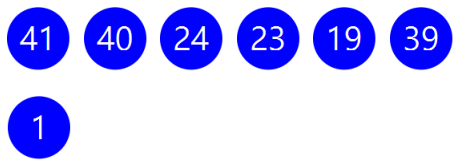

In [ ]:
b1 = Button(description="開獎")
b1.on_click(on_n_clicked)
display(b1)
show_imgs()